In [1]:
%matplotlib inline

In [2]:
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from dplatlib.common.utils import xam, csv, showDecisionBoundary, showClassifDecisionBoundary, plot_anomaly
from sklearn.ensemble import IsolationForest
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
from joblib import dump

In [3]:
X_train = csv('train.csv')
X_test = csv('test.csv')
clf = IsolationForest(n_estimators = 100, random_state=16, n_jobs = -1, verbose=10).fit(X_train)
print(type(clf))
#, max_features=2)
# NotFittedError: This IsolationForest instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.
# showDecisionBoundary(clf)
preds = clf.predict(X_train)

DEBUG: csv(train.csv, (), {})
Initial Memory used by loaded df = 1027760, time taken to first load df = 52124732 ns.
Memory used by cleaned df = 1027760, total time taken to clean columns approx = 2742338 ns.
type(var) = <class 'pandas.core.frame.DataFrame'>.
len(var) = 64227
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64227 entries, 0 to 64226
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mean    64227 non-null  float64
 1   sd      64227 non-null  float64
dtypes: float64(2)
memory usage: 1003.7 KB
Axes of df = [RangeIndex(start=0, stop=64227, step=1), Index(['mean', 'sd'], dtype='object')], shape= (64227, 2), ndim = 2, columns = Index(['mean', 'sd'], dtype='object'), df.dtypes = mean    float64
sd      float64
dtype: object, size = 128454.

        count       mean        std        min        25%        50%        75%         max
mean  64227.0 -0.0020971  0.9539659 -0.2848887 -0.1579527 -0.1579527 -0.1352856  66.

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.


Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...Building estimator 2 of 25 for this parallel run (total 100)...

Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...Building estimator 3 of 25 for this parallel run (total 100)...

Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 5 of 25 for this parallel run (total 100)...
Building estimator 5 of 25 for this parallel run (total 100)...
Building estimator 5 of 25 for this parallel run (total 100)...
Building estimator 6 of 25 for this para

[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    1.0s
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    1.0s remaining:    1.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.0s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    1.0s finished


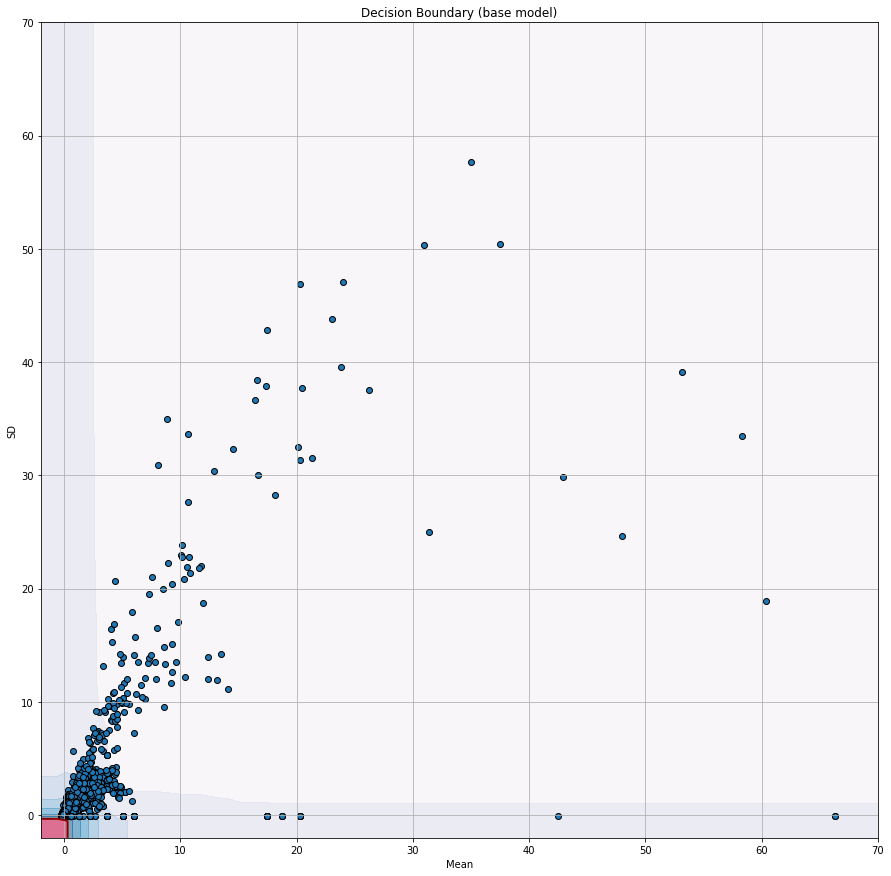

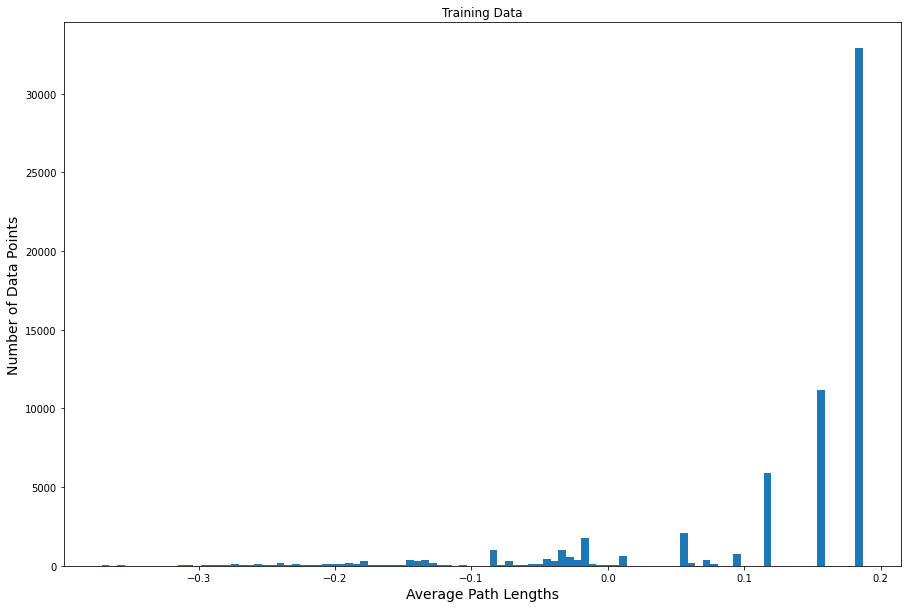

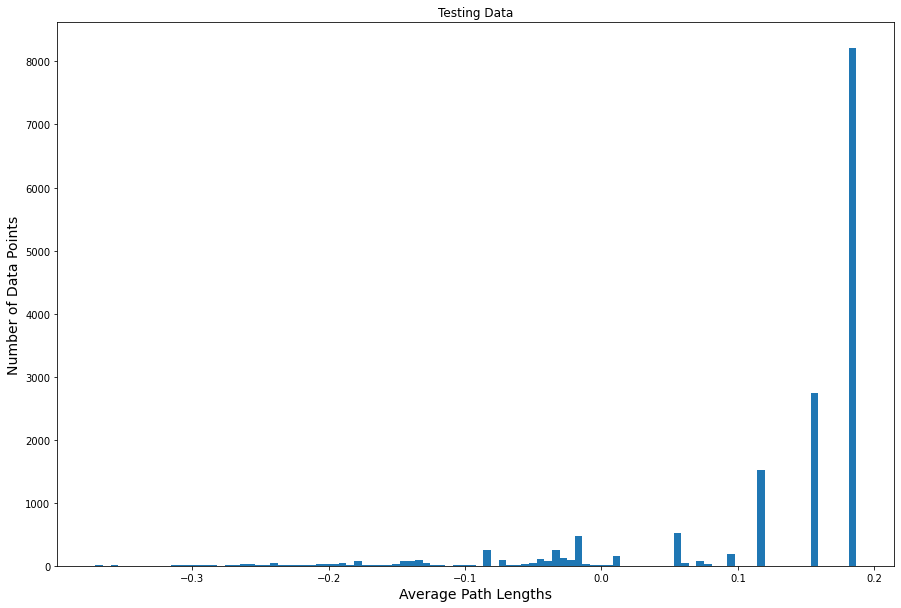

In [4]:
showDecisionBoundary(clf, X_train)
plot_anomaly(clf, X_train, "Training Data")
plot_anomaly(clf, X_test,  "Testing Data")

In [5]:
pred = clf.predict(X_test)
print(f"# of predictions = {len(pred)}")
print(pred.sum(), pred.prod())
print(np.argwhere(pred))
# showDecisionBoundary(pred, df_test)
#[ print(i) for i in pred]

# of predictions = 16057
10905 1
[[    0]
 [    1]
 [    2]
 ...
 [16054]
 [16055]
 [16056]]


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
Building estimator 1 of 25 for this parallel run (total 100)...Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 1 of 25 for this parallel run (total 100)...

Building estimator 1 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 2 of 25 for this parallel run (total 100)...

Building estimator 2 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 3 of 25 for this parallel run (total 100)...Building estimator 3 of 25 for this parallel run (total 100)...

Building estimator 3 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...
Building estimator 4 of 25 for this parallel run (total 100)...Building estimator 4 of 2

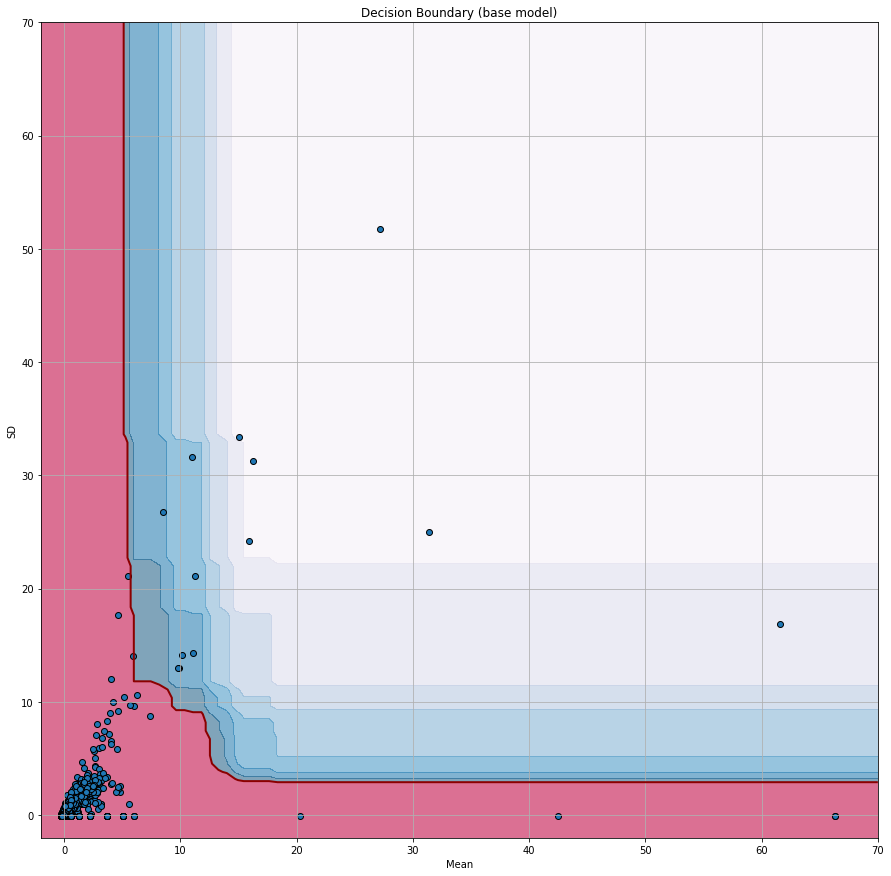

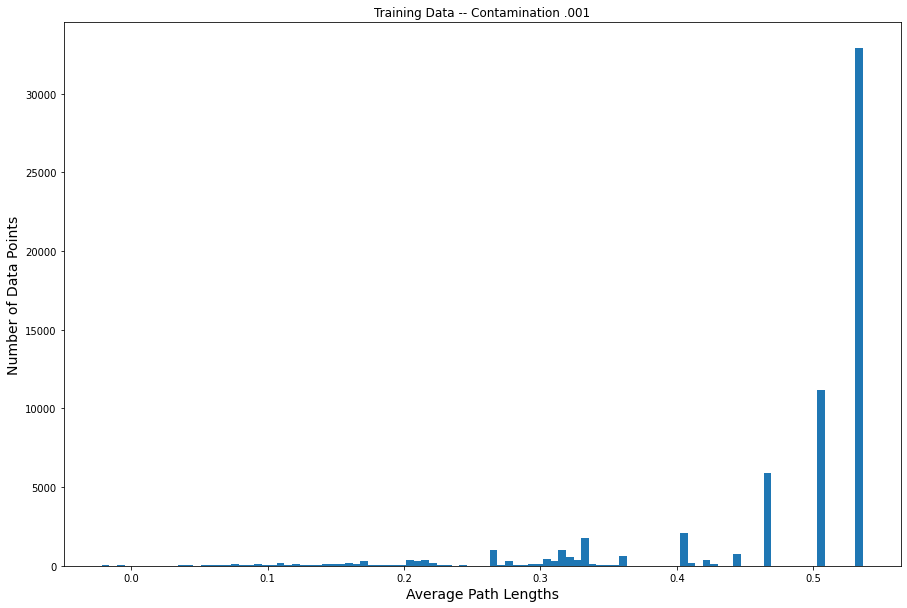

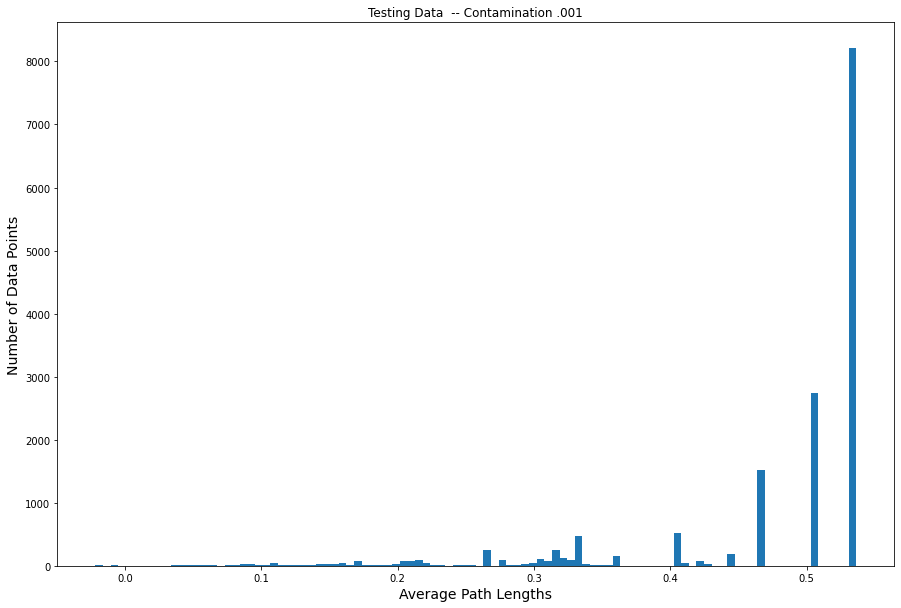

In [6]:
#Add contamination hyperparameter
cclf = IsolationForest(random_state=16, n_jobs = -1, 
        verbose=1000, contamination=.001).fit(X_train)
#cclf.fit(df_train)
# showDecisionBoundary(cclf, df_train)
showDecisionBoundary(cclf, X_test)

plot_anomaly(cclf, X_train, "Training Data -- Contamination .001")
plot_anomaly(cclf, X_test,  "Testing Data  -- Contamination .001")

In [7]:
pred = cclf.predict(X_test)
print(f"# of predictions = {len(pred)}")
print(pred.sum(), pred.prod(), np.argwhere(pred))

# showDecisionBoundary(cclf, df_test)
# plot_anomaly(cclf, df_train, "Training Data")
# plot_anomaly(cclf, df_test,  "Testing Data")

# of predictions = 16057
16031 -1 [[    0]
 [    1]
 [    2]
 ...
 [16054]
 [16055]
 [16056]]


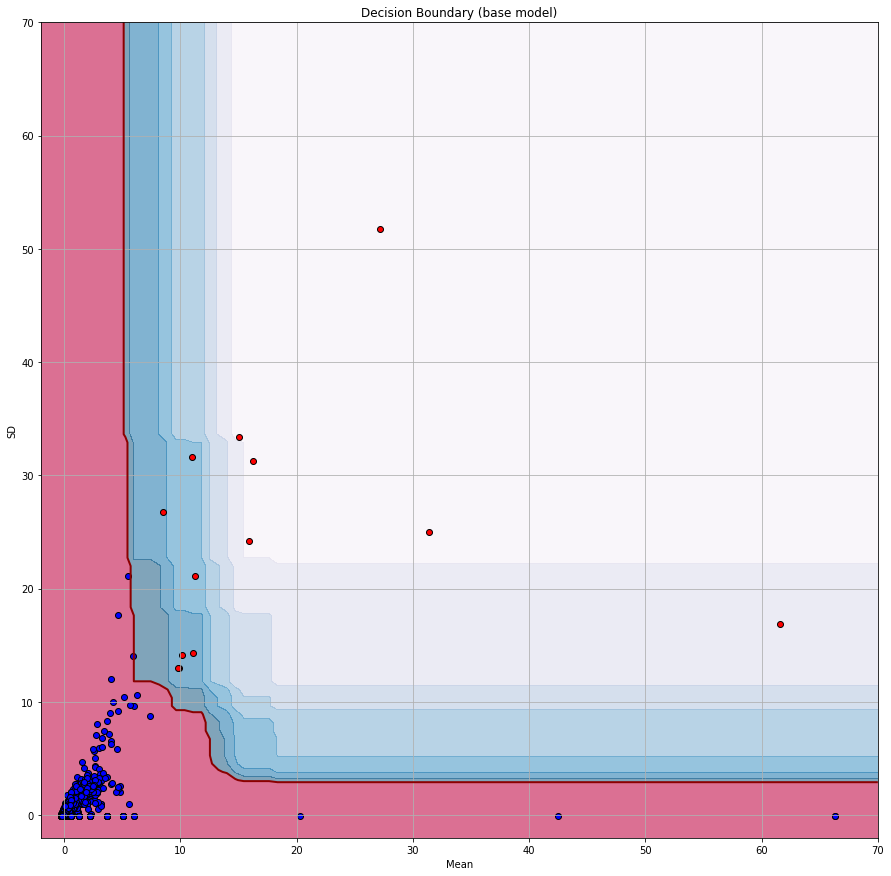

In [8]:
df_predictions = pd.concat([X_test, pd.Series(pred)], axis=1)
df_predictions.columns = ['mean', 'sd', 'output']
# showDecisionBoundary(cclf, df_predictions[df_predictions['output'] == -1])
showClassifDecisionBoundary(
            cclf, 
            df_predictions,
            'output', 
             1, 
            -1, 
            'blue',
            'red', 
            "Decision Boundary (with contamination)"
)

In [9]:
# Export the model.
dump(clf, 'model.joblib') 

['model.joblib']